In [ ]:
#Clone the GitHub repository
!git clone https://github.com/gdacanal/zea5887fzea.git

In [ ]:
import os

os.chdir('/content/zea5887fzea')

In [ ]:
#List files in the current directory
%%shell
ls

In [ ]:
#Optional (mount Google Drive)
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Importar os pacotes e bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
pi = np.pi

# To read the excel file N_init.xls into a array
data = pd.read_excel('Eaula06ex2PlanilhaCineticaFit.xlsx', usecols = "A,B")
data = data.values
print(data[:,1])


[5.34896 5.05193 4.80528 4.54127 4.29062 4.03039 3.84482 3.62075 3.40521
 3.25332 3.03865 2.9179  2.7418  2.64381 2.49419 2.35764 2.23462 2.1546
 2.03924 1.93874 1.8401  1.74555 1.64682 1.56902 1.49079 1.43921 1.34546
 1.30235 1.23222 1.17946 1.12075 1.08048 1.02623 1.002   0.94061 0.91103
 0.83762 0.83404 0.77849 0.73552 0.7143  0.69015 0.67148 0.62922 0.59146
 0.57195 0.5491  0.52323 0.51403 0.49603 0.46295 0.44094 0.44453 0.4092
 0.39361 0.35643 0.36673 0.33834 0.32756 0.32827 0.3275  0.31252 0.31362
 0.29032 0.28797 0.27364 0.27148 0.26711 0.27405 0.25051 0.24498 0.25408
 0.24549 0.24684 0.23798 0.25267 0.23639 0.22703 0.22155 0.23464 0.24015
 0.23131 0.22401 0.21611 0.22142 0.21044 0.21479 0.2122  0.21611 0.19467
 0.21381 0.20634 0.19866 0.20993 0.18887 0.18949 0.1879  0.21494 0.21494
 0.21494 0.21494]


[ 1.00000000e+00  9.42200367e-01  8.94204275e-01  8.42830067e-01
  7.94055607e-01  7.43416956e-01  7.07306537e-01  6.63704329e-01
  6.21761991e-01  5.92205427e-01  5.50432383e-01  5.26935411e-01
  4.92667777e-01  4.73599717e-01  4.44484876e-01  4.17913352e-01
  3.93974656e-01  3.78403412e-01  3.55955291e-01  3.36398804e-01
  3.17204259e-01  2.98805595e-01  2.79593536e-01  2.64454286e-01
  2.49231362e-01  2.39194312e-01  2.20951321e-01  2.12562464e-01
  1.98915734e-01  1.88649065e-01  1.77224575e-01  1.69388359e-01
  1.58831748e-01  1.54116786e-01  1.42170789e-01  1.36414761e-01
  1.22129769e-01  1.21433130e-01  1.10623550e-01  1.02261936e-01
  9.81326961e-02  9.34333017e-02  8.98002709e-02  8.15768171e-02
  7.42290269e-02  7.04325389e-02  6.59861139e-02  6.09520214e-02
  5.91617759e-02  5.56591217e-02  4.92220216e-02  4.49390538e-02
  4.56376387e-02  3.87627069e-02  3.57290191e-02  2.84940922e-02
  3.04983888e-02  2.49739247e-02  2.28762240e-02  2.30143842e-02
  2.28645485e-02  1.99495

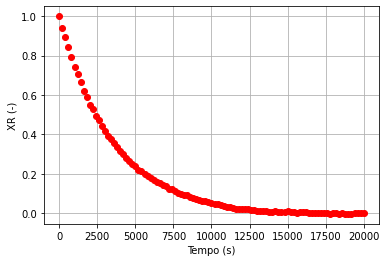

Parameters: [1.00266123e+00 2.92014080e-04]
RMSE: 0.005837690021329369
R-squared: 0.9995640139574202



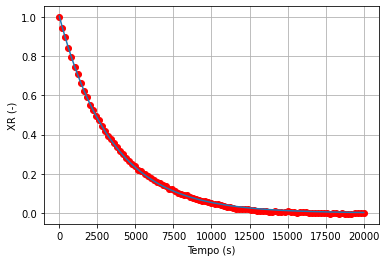

In [ ]:
# Comprimento do vetor ou numero de linhas
n = len(data)

# Criar um vetor nulo
XR = np.zeros(n)

# Calcular o valor de XR
for i in range(n):
    XR[i] = (data[i,1]-0.21)/(5.34896-0.21)

print(XR)

X = data[:,0]
Y = XR

plt.plot(X,Y,'ro')
plt.grid(True)
plt.xlabel('Tempo (s)'); plt.ylabel('XR (-)')
plt.show()


# Ajuste pela biblioteca "curve fit"
from scipy.optimize import curve_fit
xData = data[:,0]
yData = XR

def func(x, a, k):
    return a*np.exp(-k*x)

initialParameters = [1, 0.0002]

# curve fit sobre os dados
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

# Criar o grafico com o modelo ajustado
plt.plot(X,Y,'ro')
plt.plot(X,modelPredictions,'-')
plt.grid(True)
plt.xlabel('Tempo (s)'); plt.ylabel('XR (-)')
plt.show()